In [2]:
# 주어진 데이터셋으로 다양한 머신러닝을 적용해보자.

KNN(최근접 이웃 알고리즘)

c:\USERS\DILAB\ANACONDA3\ENVS\ML\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


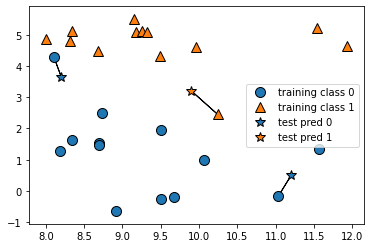

In [3]:
import mglearn
from matplotlib import pyplot as plt

mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()

In [4]:
# dataset : make_forge
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=42)

c:\USERS\DILAB\ANACONDA3\ENVS\ML\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [5]:
print(X_train,X_train.shape)
print(y_train, y_train.shape)

[[ 9.50169345  1.93824624]
 [ 9.32298256  5.09840649]
 [ 8.18378052  1.29564214]
 [10.06393839  0.99078055]
 [ 8.92229526 -0.63993225]
 [ 9.25694192  5.13284858]
 [ 9.50048972 -0.26430318]
 [ 8.69289001  1.54322016]
 [11.563957    1.3389402 ]
 [ 8.1062269   4.28695977]
 [11.0329545  -0.16816717]
 [ 9.17748385  5.09283177]
 [ 8.34810316  5.13415623]
 [ 9.49123469  4.33224792]
 [11.93027136  4.64866327]
 [ 7.99815287  4.8525051 ]
 [11.54155807  5.21116083]
 [ 8.67494727  4.47573059]
 [ 9.96346605  4.59676542]] (19, 2)
[0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1] (19,)


In [6]:
# KNN 알고리즘 사용, 이웃 숫 = 3
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)

In [7]:
clf.predict(X_test) # 학습된 것으로 예측하기

array([1, 0, 1, 0, 0, 0, 0])

In [8]:
clf.score(X_test,y_test)        # 정확도 구하기

0.8571428571428571

In [10]:
# 유방암 데이터셋 사용, KNN 알고리즘 사용

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [11]:
cancer.data.shape, cancer.target.shape
# 데이터셋의 열의 개수가 30개일 때

((569, 30), (569,))

No handles with labels found to put in legend.


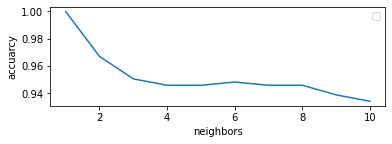

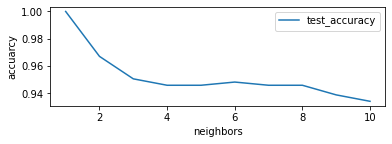

In [19]:
# 열이 1개가 아닐때에는 선형모델을 사용하지 못한다.
# 그럼 어떤 모델을 사용해야할까? 여기서는 KNN(KNeighborsClassifier)을 사용했다.

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
for n_neighbors in neighbors_settings:   # 이웃의 개수를 1개부터 10개까지 늘려가며 실험한다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)        # Train 셋으로 학습시킴
    training_accuracy.append(clf.score(X_train,y_train))    # Train셋의 정확도
    test_accuracy.append(clf.score(X_train,y_train))        # Test셋의 정확도


plt.subplot(2, 1, 1)
plt.ylabel('accuarcy')
plt.xlabel('neighbors')
plt.legend()
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")  # x축 : 이웃 수, y축 : 학습 정확도
plt.show()
plt.subplot(2, 1, 2)
plt.plot(neighbors_settings, test_accuracy, label="test_accuracy")      # x축 : 이웃 수, y축 : 테스트 정확도
plt.ylabel('accuarcy')
plt.xlabel('neighbors')
plt.legend()
plt.show()
# 이웃수가 증가함에 따라 정확도가 낮아짐을 알 수 있다.

데이터셋 : make_wave()
사용 모델 : 선형회귀 (LinearRegression)

In [22]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
# Train과 test셋 분할
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train,y_train)

In [23]:
print(X_train, y_train)
# x값 : X_train, y값 : y_train

[[ 0.14853859]
 [ 0.60669007]
 [-2.65149833]
 [-2.26777059]
 [-2.06388816]
 [ 2.45592241]
 [-1.25262516]
 [ 2.7937922 ]
 [-2.72863627]
 [ 1.71105577]
 [-2.46904499]
 [-1.89957294]
 [ 0.08540663]
 [ 1.24843547]
 [ 0.64526911]
 [-1.80195731]
 [-1.17454654]
 [-0.26358009]
 [ 2.53124541]
 [ 2.81945911]
 [-2.60969044]
 [ 2.3689641 ]
 [-0.02893854]
 [-2.41396732]
 [-2.72129752]
 [-1.44732011]
 [ 2.70428584]
 [-2.16303684]
 [ 1.39196365]
 [ 0.12040813]
 [-0.35908504]
 [ 1.85038409]
 [-0.80182894]
 [-1.89087327]
 [-2.87649303]
 [-1.24713211]
 [-0.40832989]
 [-1.04801802]
 [ 0.67111737]
 [ 2.19705687]
 [-2.79366887]
 [-1.9090502 ]
 [ 0.55448741]
 [ 1.65079694]
 [ 1.10539816]] [ 0.26134393  0.29262945 -0.70117304 -1.7113156  -1.32035898  1.19812891
 -0.74646948  0.95081838 -1.03731593  0.79900059 -1.7240941  -0.94575843
  0.97923163  0.44971554 -0.72142625 -1.11948406 -0.32691082 -0.38575444
  0.82614241  1.39515571 -0.83684971  1.28948157 -0.32309571 -0.9139074
 -0.08137001 -0.75150632  0.50015

In [24]:
lr.coef_, lr.intercept_     # 직선의 방정식 계수 y절편

(array([0.39390555]), -0.031804343026759746)

In [25]:
# test셋의 정확도
lr.score(X_test,y_test)

0.65933685968637